# DSCI 100 Project - Group 12
Authors:  

Tia Murdoch 719191378

Sam Wang 70602008

Hanna Ross 40955320

Maan Grover 62953260

# Introduction

Raisins are dried grapes and they are eaten all over the world. The small dehydrated fruit can be eaten on its own or is often used in cooking and baking. Raisins will obtain their primary differences from the type of grape used to produce them, as well as the drying method.

Our dataset considers two types of raisins that are popular in Turkey, Besni and Kecimen.
Besni raisins are produced from the Sultana grape, and are characterized by their small, oval shape and light brown color.
The Kecimen raisins are made from Black Corinth grapes. They are dark brown, round, and smooth. They are also generally smaller than Besni raisins.

We will be using this dataset to determine how various size measurements can predict the classification of raisins to these two species.

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(GGally)
library(digest)
library(cowplot)
library(gridExtra)

set.seed(123)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
getwd()

[1] "/home/jovyan/DSCI100-project"

In [3]:
raisin <- read_csv("/home/jovyan/DSCI100-project/raisin.csv")|>
    mutate(Class = as_factor(Class))
glimpse(raisin)


Rows: 900 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Class
dbl (7): Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, E...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 900
Columns: 8
$ Area            <dbl> 87524, 75166, 90856, 45928, 79408, 49242, 42492, 60952…
$ MajorAxisLength <dbl> 442.2460, 406.6907, 442.2670, 286.5406, 352.1908, 318.…
$ MinorAxisLength <dbl> 253.2912, 243.0324, 266.3283, 208.7600, 290.8275, 200.…
$ Eccentricity    <dbl> 0.8197384, 0.8018052, 0.7983536, 0.6849892, 0.5640113,…
$ ConvexArea      <dbl> 90546, 78789, 93717, 47336, 81463, 51368, 43904, 62329…
$ Extent          <dbl> 0.7586506, 0.6841296, 0.6376128, 0.6995994, 0.7927719,…
$ Perimeter       <dbl> 1184.040, 1121.786, 1208.575, 844.162, 1073.251, 881.8…
$ Class           <fct> Kecimen, Kecimen, Kecimen, Kecimen, Kecimen, Kecimen, …


In [4]:
raisin_split <- initial_split(raisin, prop = .75, strata = Class)
raisin_train <- training(raisin_split)
raisin_test <- testing(raisin_split)

In [5]:
raisin_summarize <- raisin_train |>
    group_by(Class) |>
    summarize(Area_mean = mean(Area), MajorAxisLength_mean = mean(MajorAxisLength), MinorAxisLength_mean = mean(MinorAxisLength),
              Eccentricity_mean = mean(Eccentricity), ConvexArea_mean = mean(ConvexArea), Extent_mean = mean(Extent), 
                  Perimeter_mean = mean(Perimeter), observations = n())
raisin_summarize

Class,Area_mean,MajorAxisLength_mean,MinorAxisLength_mean,Eccentricity_mean,ConvexArea_mean,Extent_mean,Perimeter_mean,observations
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Kecimen,63994.55,355.2678,230.0726,0.7435603,66255.53,0.7071761,988.8967,337
Besni,110053.10,503.0439,277.7713,0.8196521,114424.92,0.6909313,1335.9067,337


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



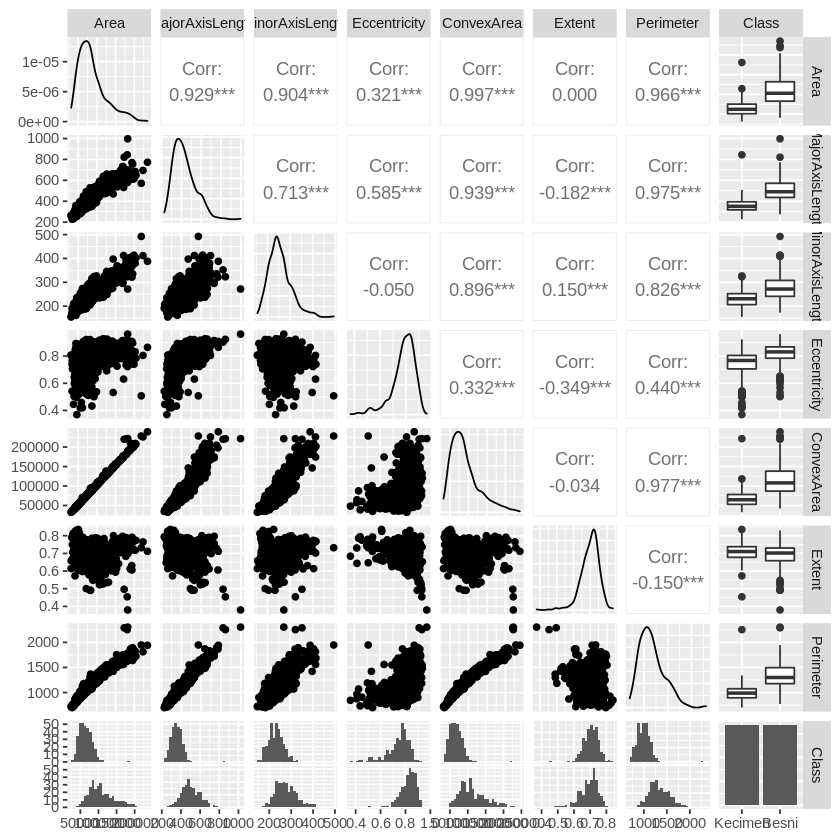

In [6]:
#Use ggpairs function to look at relationship between different variables. 
ggpairs(raisin_train)

In [7]:
##Based on the above plots, 4 variables were selected as having a high correlation with the type of raisin:
#Area, Majour Axis Length, Convex area and perimeter.

#Those variables were then plotted against each other. 

In [8]:
plot_1 <- raisin_train |>
    ggplot(aes(x = Area, y = MajorAxisLength, color = Class)) +
    geom_point() +
    labs(x = "Area", y = "Major Axis Length", color = "Class")

In [9]:
plot_2 <- raisin_train |>
    ggplot(aes(x = Area, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Area", y = "Perimeter", color = "Class")


In [10]:
plot_3 <- raisin_train |>
    ggplot(aes(x = Area, y = ConvexArea, color = Class)) +
    geom_point() +
    labs(x = "Perimeter", y = "Convex Area", color = "Class")


In [11]:
plot_4 <- raisin_train |>
    ggplot(aes(x = MajorAxisLength, y = ConvexArea, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Convex Area", color = "Class")


In [12]:
plot_5 <- raisin_train |>
    ggplot(aes(x = MajorAxisLength, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Area", y = "Perimeter", color = "Class")


In [13]:
plot_6 <- raisin_train |>
    ggplot(aes(x = ConvexArea, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Convex Area", y = "Perimeter", color = "Class")


In [14]:
#Create Classification model

In [15]:
raisin_proportions <- raisin_train |>
                      group_by(Class) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(raisin_train))
raisin_proportions

Class,n,percent
<fct>,<int>,<dbl>
Kecimen,337,50
Besni,337,50


In [16]:
whole_raisin_proportions <- raisin |>
                      group_by(Class) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(raisin))
whole_raisin_proportions

Class,n,percent
<fct>,<int>,<dbl>
Kecimen,450,50
Besni,450,50


In [17]:
#We can see here that the proportion of the each class has been presevered during the splitting of the groups. 

In [18]:
raisin_recipe <- recipe(Class ~ Area + MajorAxisLength + Perimeter + ConvexArea, data = raisin_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
raisin_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [19]:
#tuning Classifier


In [20]:
raisin_vfold <- vfold_cv(raisin_train, v = 5, strata = Class)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(raisin_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = raisin_vfold)|>
  collect_metrics()

knn_fit

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.8265145,5,0.009895505,Preprocessor1_Model1
roc_auc,binary,0.8822233,5,0.008819497,Preprocessor1_Model1


In [21]:
raisin_vfold_metrics <- workflow() |>
                  add_recipe(raisin_recipe) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = raisin_vfold) |>
                  collect_metrics()
raisin_vfold_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.8265145,5,0.009895505,Preprocessor1_Model1
roc_auc,binary,0.8822233,5,0.008819497,Preprocessor1_Model1


In [22]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [23]:
knn_fit <- workflow() |>
  add_recipe(raisin_recipe) |>
  add_model(knn_spec) |>
  fit(data = raisin_train)
knn_fit


Warning message:
“tune samples were requested but there were 674 rows in the data. 669 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3382789
Best kernel: rectangular
Best k: 669

In [24]:
k_vals <- tibble(neighbors = seq(from = 20, to = 40, by = 2))

knn_results <- workflow() |>
  add_recipe(raisin_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = raisin_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
20,accuracy,binary,0.8457419,5,0.007333637,Preprocessor1_Model01
22,accuracy,binary,0.8487050,5,0.005759866,Preprocessor1_Model02
24,accuracy,binary,0.8531168,5,0.005884400,Preprocessor1_Model03
26,accuracy,binary,0.8516462,5,0.006955676,Preprocessor1_Model04
28,accuracy,binary,0.8501756,5,0.008152421,Preprocessor1_Model05
30,accuracy,binary,0.8501756,5,0.009092947,Preprocessor1_Model06
32,accuracy,binary,0.8472125,5,0.006254948,Preprocessor1_Model07
34,accuracy,binary,0.8531387,5,0.007020480,Preprocessor1_Model08
36,accuracy,binary,0.8486831,5,0.006745316,Preprocessor1_Model09


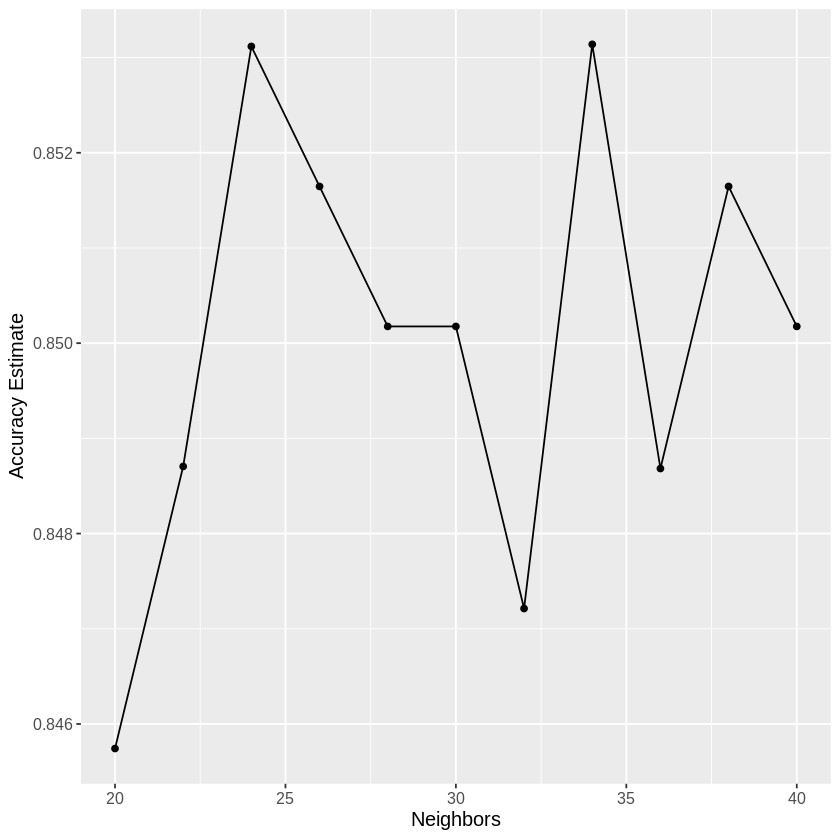

In [25]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

In [26]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(raisin_recipe) |>
  add_model(knn_spec) |>
  fit(data = raisin_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(25,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.152819
Best kernel: rectangular
Best k: 25

In [27]:
raisin_predictions <- predict(knn_fit, raisin_test) |>
  bind_cols(raisin_test)

glimpse(raisin_predictions)

Rows: 226
Columns: 9
$ .pred_class     <fct> Besni, Besni, Kecimen, Kecimen, Kecimen, Kecimen, Keci…
$ Area            <dbl> 87524, 90856, 79408, 43441, 33565, 57346, 75620, 73167…
$ MajorAxisLength <dbl> 442.2460, 442.2670, 352.1908, 276.6108, 261.5543, 330.…
$ MinorAxisLength <dbl> 253.2912, 266.3283, 290.8275, 201.8131, 167.7085, 222.…
$ Eccentricity    <dbl> 0.8197384, 0.7983536, 0.5640113, 0.6838823, 0.7673743,…
$ ConvexArea      <dbl> 90546, 93717, 81463, 45133, 35794, 59365, 77493, 74545…
$ Extent          <dbl> 0.7586506, 0.6376128, 0.7927719, 0.6908556, 0.6815505,…
$ Perimeter       <dbl> 1184.040, 1208.575, 1073.251, 803.748, 751.413, 928.27…
$ Class           <fct> Kecimen, Kecimen, Kecimen, Kecimen, Kecimen, Kecimen, …


In [28]:
raisin_predictions |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.880531


In [29]:
confusion_mat <- raisin_predictions |>
             conf_mat(truth = Class, estimate = .pred_class)
confusion_mat

          Truth
Prediction Kecimen Besni
   Kecimen     103    17
   Besni        10    96

In [30]:
glimpse(raisin_train)

Rows: 674
Columns: 8
$ Area            <dbl> 117592, 96582, 61409, 134303, 83107, 107178, 64391, 12…
$ MajorAxisLength <dbl> 533.2929, 446.7052, 403.7013, 600.7663, 507.3809, 508.…
$ MinorAxisLength <dbl> 288.5583, 278.3255, 209.3659, 288.3849, 233.1538, 270.…
$ Eccentricity    <dbl> 0.8409660, 0.7821716, 0.8550074, 0.8772529, 0.8881652,…
$ ConvexArea      <dbl> 123587, 100113, 67286, 138133, 93706, 110611, 68813, 1…
$ Extent          <dbl> 0.7300677, 0.7065976, 0.5973929, 0.7424362, 0.4910020,…
$ Perimeter       <dbl> 1432.006, 1216.979, 1083.477, 1497.515, 1367.331, 1325…
$ Class           <fct> Besni, Besni, Besni, Besni, Besni, Besni, Besni, Besni…


In [31]:
#Visualizations of the analysis


In [32]:
plot2.1 <- raisin_test |>
    ggplot(aes(x = Area, y= MajorAxisLength, color = Class))+
    geom_point(alpha = 0.6)+
    labs(x = "Area" , y = "Major Axis Length", color = "Class",
        subtitle="Area vs. Major Axis Length")+
  theme(text = element_text(size = 12))

plot2.2 <- raisin_predictions |>
    ggplot(aes(x = Area, y= MajorAxisLength, color = .pred_class))+
    geom_point(alpha = 0.6)+
    labs(x = "Area" , y = "Major Axis Length", color = "Predicted Class",
        subtitle="Area vs. Major Axis Length")+
  theme(text = element_text(size = 12))


In [33]:
plot2.3 <- raisin_test |>
    ggplot(aes(x = Area, y= ConvexArea, color = Class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 7")+
    labs(x = "Area" , y = "Major Axis Length", color = "Class",
        subtitle="Area vs. Convex Area")+
  theme(text = element_text(size = 12))

plot2.4 <- raisin_predictions |>
    ggplot(aes(x = Area, y= ConvexArea, color = .pred_class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 7")+
    labs(x = "Area" , y = "Major Axis Length", color = "Predicted Class",
        subtitle="Area vs. Convex Area")+
  theme(text = element_text(size = 12))


In [34]:
plot2.5 <- raisin_test |>
    ggplot(aes(x = Area, y= Perimeter, color = Class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 8")+
    labs(x = "Area" , y = "Perimeter", color = "Class",
        subtitle="Area vs. Perimeter")+
  theme(text = element_text(size = 12))

plot2.6 <- raisin_predictions |>
    ggplot(aes(x = Area, y= Perimeter, color = .pred_class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 8")+
    labs(x = "Area" , y = "Perimeter", color = "Predicted Class",
        subtitle="Area vs. Perimeter")+
    theme(text = element_text(size = 12))


In [35]:
plot2.7 <- raisin_test |>
    ggplot(aes(x = MajorAxisLength, y= ConvexArea, color = Class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 9")+
    labs(x = "Major Axis Length" , y = "Convex Area", color = "Class",
        subtitle = "Major Axis Length vs. Convex Area")+
      theme(text = element_text(size = 12))

plot2.8 <- raisin_predictions |>
    ggplot(aes(x = MajorAxisLength, y= ConvexArea, color = .pred_class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 9")+
    labs(x = "Major Axis Length" , y = "Convex area", color = "Predicted Class",
        subtitle = "Major Axis Length vs. Convex Area")+
      theme(text = element_text(size = 12))

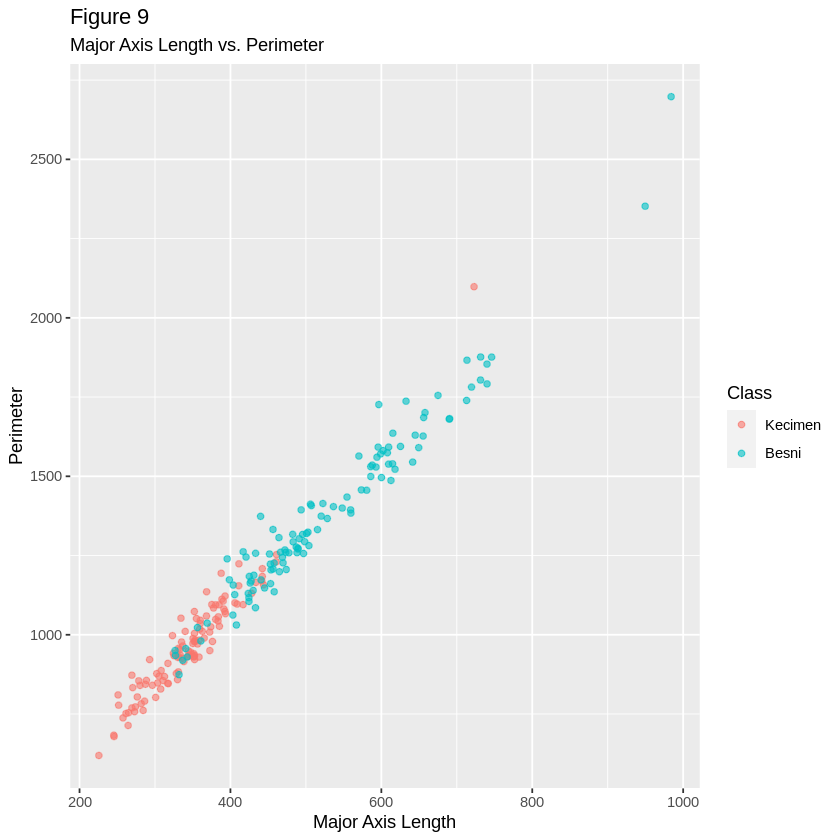

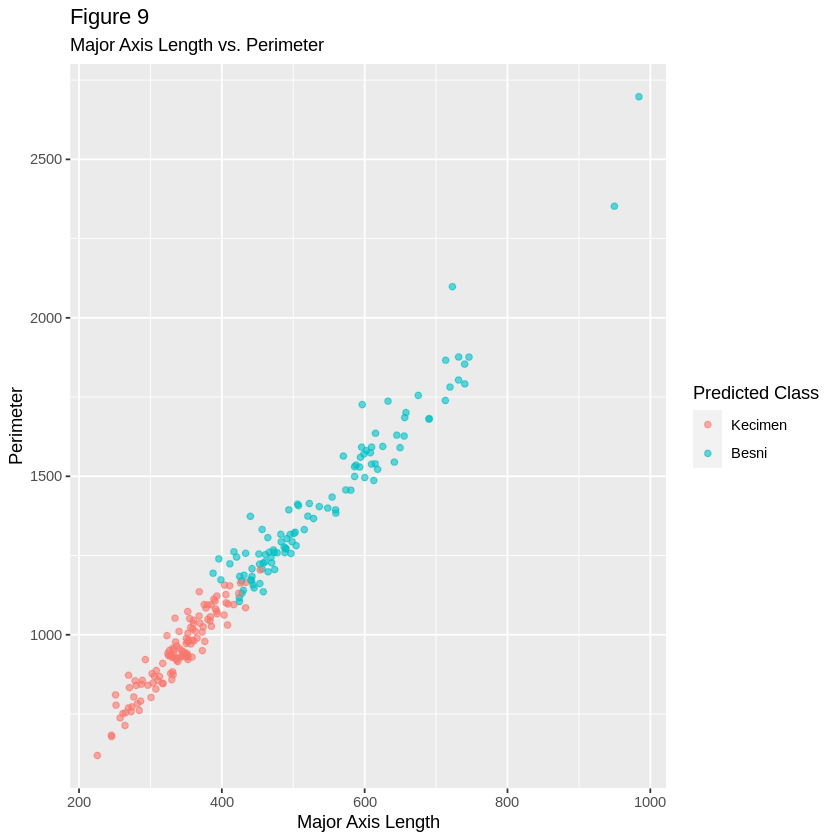

In [36]:
plot2.9 <- raisin_test |>
    ggplot(aes(x = MajorAxisLength, y= Perimeter, color = Class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 9")+
    labs(x = "Major Axis Length" , y = "Perimeter", color = "Class",
        subtitle = "Major Axis Length vs. Perimeter")

plot2.10 <- raisin_predictions |>
    ggplot(aes(x = MajorAxisLength, y= Perimeter, color = .pred_class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 9")+
    labs(x = "Major Axis Length" , y = "Perimeter", color = "Predicted Class",
        subtitle = "Major Axis Length vs. Perimeter")
plot2.9
plot2.10

In [37]:
plot2.11 <- raisin_test |>
    ggplot(aes(x = ConvexArea, y= Perimeter, color = Class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 10")+
    labs(x = "Convex Area" , y = "Perimeter", color = "Class",
        subtitle = "Convex Area vs. Perimeter")

plot2.12 <- raisin_predictions |>
    ggplot(aes(x = ConvexArea, y= Perimeter, color = .pred_class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 10")+
    labs(x = "Convex Area" , y = "Perimeter", color = "Predicted Class",
        subtitle = "Convex Area vs. Perimeter")


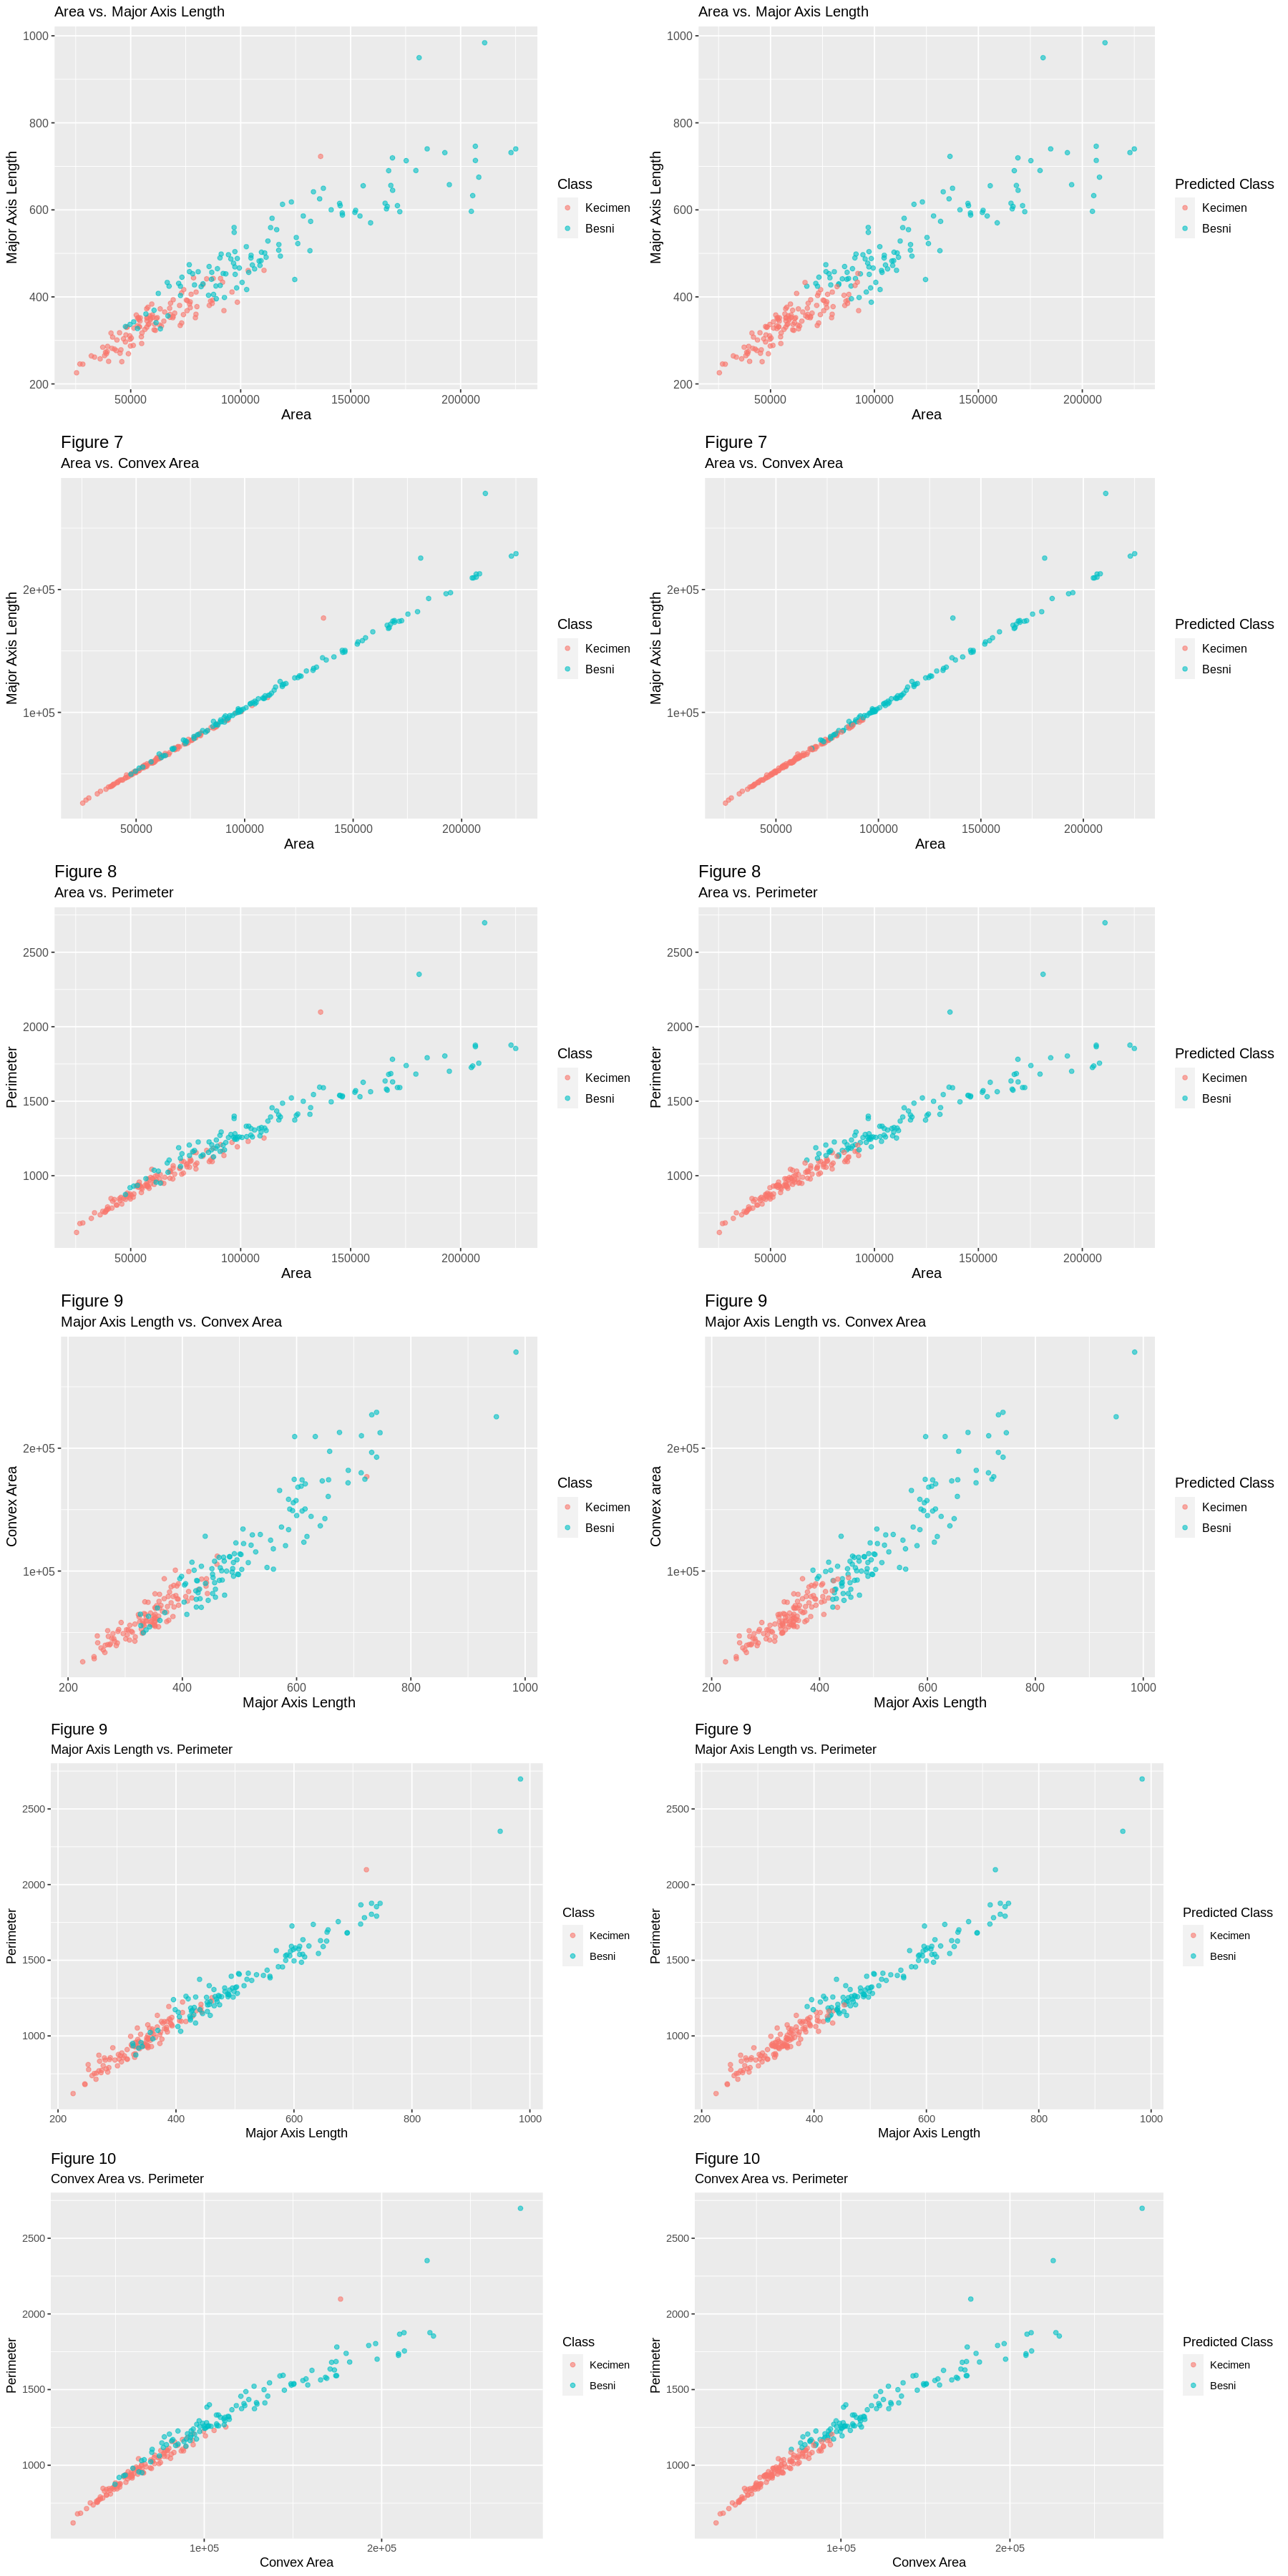

In [38]:
options(repr.plot.width = 15, repr.plot.height = 30)
plot_grid(plot2.1, plot2.2,
          plot2.3, plot2.4,
          plot2.5, plot2.6,
          plot2.7, plot2.8,
          plot2.9, plot2.10,
          plot2.11, plot2.12, ncol = 2)